# Fake_News_Prediction_Model

## Dataset Description:

https://www.kaggle.com/c/fake-news/data

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:

           1: Fake News
           0: Real News

## Import the Dependencies

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# NLP Library
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Data collection and processing

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Python data\Projects\Capston_Project\train.csv")

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Checking the number of rows and columns
df.shape

(20800, 5)

In [6]:
# Check for Null Values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# we will only Going to use title and author Columns for Our prediction
df.drop(['id','text'],axis=1,inplace=True)

In [8]:
df.head()

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1


## Data Cleaning

In [9]:
# Check for Null Values
df.isnull().sum()

title      558
author    1957
label        0
dtype: int64

In [10]:
# Drop Null values
df = df.dropna()

In [11]:
# Check for Duplicated Values
df.duplicated().sum()

164

In [12]:
# Drop Duplicated Values
df = df.drop_duplicates(keep='first')

In [13]:
# Merge both Columns Author and Title and Create New Column Content
df['content'] = df['title'] + ' ' + df['author'] 

In [14]:
df.head()

,title,author,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...


## Data Preprocessing
- Convert text to lowercase
- Remove punctuation 
- Tokenization
- Remove stopwprds
- Lemmatization

In [15]:
le = WordNetLemmatizer()

In [16]:
# Function for entire text transformation

def text_preprocessing(text): 
    # Convert text into lowercase
    text = text.lower()
    
    # Remove Punctuation & special charectors
    text_without_punc = re.sub('[^a-zA-Z]',' ',text)
    
    # Tokenize text into list
    tokenize_text = nltk.word_tokenize(text_without_punc)
    
    # remove Stopwords
    transformed_text = [le.lemmatize(i) for i in tokenize_text if i not in stopwords.words('english')]
    
    return " ".join(transformed_text)

In [17]:
# Let's Apply This Transformation Function on Our Content Column
df['transformed_content'] = df['content'].apply(text_preprocessing)

In [18]:
# Drop title author and old content column
df = df.drop(['title','author','content'],axis=1)

In [19]:
df.head()

,label,transformed_content
0,1,house dem aide even see comey letter jason cha...
1,0,flynn hillary clinton big woman campus breitba...
2,1,truth might get fired consortiumnews com
3,1,civilian killed single u airstrike identified ...
4,1,iranian woman jailed fictional unpublished sto...


In [20]:
# let's create new column like number of characters, number of words
df['number_of_characters'] = df['transformed_content'].apply(lambda x:len(x))
df['number_of_words'] = df['transformed_content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,label,transformed_content,number_of_characters,number_of_words
0,1,house dem aide even see comey letter jason cha...,73,12
1,0,flynn hillary clinton big woman campus breitba...,63,10
2,1,truth might get fired consortiumnews com,40,6
3,1,civilian killed single u airstrike identified ...,61,8
4,1,iranian woman jailed fictional unpublished sto...,91,12


## Exploratory Data Analysis

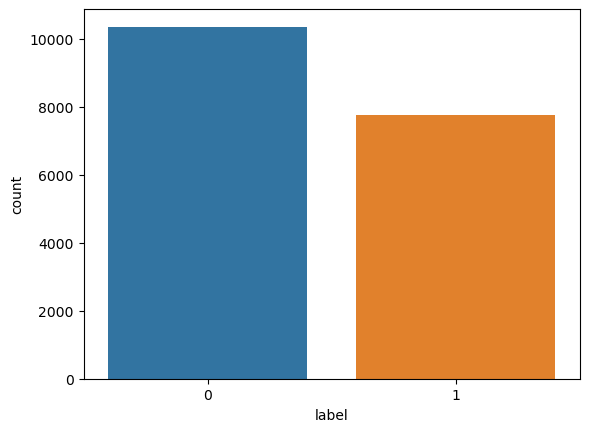

In [22]:
# Check Count of labels
sns.countplot(x='label',data=df);

## Our Data is Balanced

In [23]:
# statical info for True news
df[['number_of_characters','number_of_words']][df['label'] == 0].describe()

,number_of_characters,number_of_words
count,10355.000000,10355.000000
mean,78.085176,12.084693
std,16.226910,2.386677
min,26.000000,5.000000
25%,67.000000,10.000000
50%,77.000000,12.000000
75%,88.000000,14.000000
max,160.000000,24.000000


In [24]:
# statical info for fake news
df[['number_of_characters','number_of_words']][df['label'] == 1].describe()

,number_of_characters,number_of_words
count,7766.000000,7766.000000
mean,66.132114,9.682333
std,26.037628,3.694818
min,0.000000,0.000000
25%,50.000000,7.000000
50%,64.000000,9.000000
75%,80.000000,12.000000
max,387.000000,51.000000


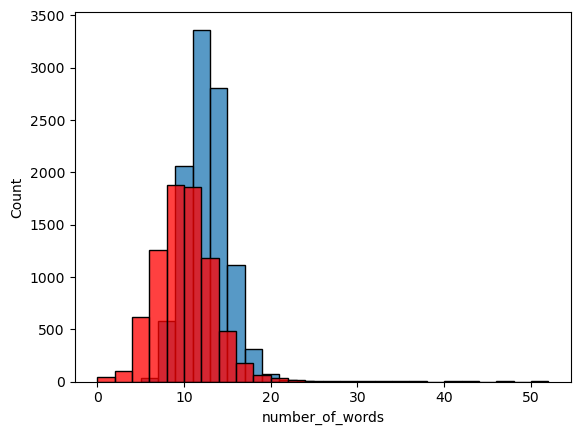

In [25]:
# histplot for Fake News words and True News words
sns.histplot(df['number_of_words'][df['label'] == 0],bins=50,binwidth=2)
sns.histplot(df['number_of_words'][df['label'] == 1],color='red',binwidth=2);

### Let's make wordcloud of True and Fake News Respectively. so, we can analyze that which words are often used in both type of news

In [26]:
# import wordcloud
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='white',min_font_size=10,width=500,height=500)

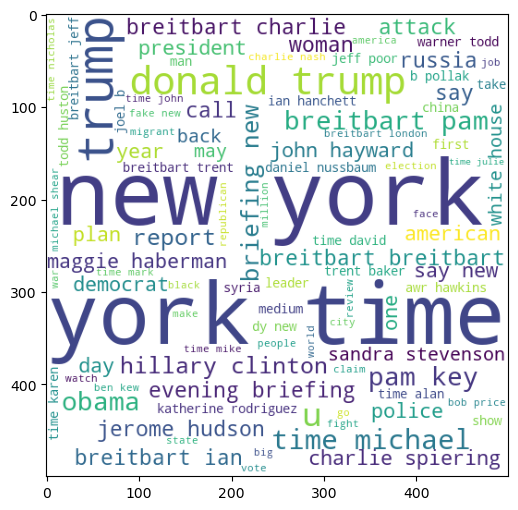

In [27]:
# WordCloud for True News
true_news_wc = wc.generate(df[df['label'] == 0]['transformed_content'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()

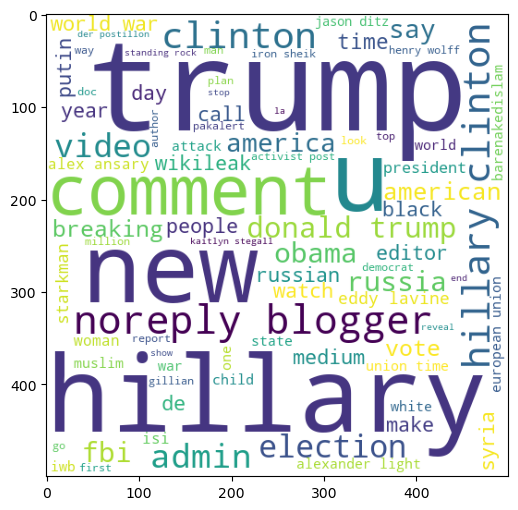

In [28]:
# WordCloud for Fake news
fake_news_wc = wc.generate(df[df['label'] == 1]['transformed_content'].str.cat(sep = " "))
plt.figure(figsize=(8,6))
plt.imshow(fake_news_wc)
plt.show()

### We can clearly see from this wordcloud that which words are most used in true and fake news.

## Feature Splitting

In [29]:
# Let's Separate our Input and Output Columns
X = df['transformed_content'].values
Y = df['label'].values

In [30]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

### Splitting the dataset to training & test data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

### Training the Model on Logistic Regression

In [32]:
LR = LogisticRegression()

In [33]:
LR.fit(X_train, Y_train)

LogisticRegression()

In [34]:
pred_LR = LR.predict(X_test)
confusion_matrix(pred_LR, Y_test)

array([[2019,   20],
       [  52, 1534]], dtype=int64)

In [35]:
print(classification_report(pred_LR, Y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2039
           1       0.99      0.97      0.98      1586

    accuracy                           0.98      3625
   macro avg       0.98      0.98      0.98      3625
weighted avg       0.98      0.98      0.98      3625



### Training the Model on Naive Bayes

In [36]:
NB = MultinomialNB()

In [37]:
NB.fit(X_train, Y_train)

MultinomialNB()

In [38]:
pred_NB = NB.predict(X_test)
confusion_matrix(pred_NB, Y_test)

array([[2066,  217],
       [   5, 1337]], dtype=int64)

In [39]:
print(classification_report(pred_NB, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2283
           1       0.86      1.00      0.92      1342

    accuracy                           0.94      3625
   macro avg       0.93      0.95      0.94      3625
weighted avg       0.95      0.94      0.94      3625



### Training the Model on RandomForestm

In [43]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [44]:
pred_RF = RF.predict(X_test)
confusion_matrix(pred_RF, Y_test)

array([[2054,    7],
       [  17, 1547]], dtype=int64)

In [45]:
print(classification_report(pred_RF, Y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2061
           1       1.00      0.99      0.99      1564

    accuracy                           0.99      3625
   macro avg       0.99      0.99      0.99      3625
weighted avg       0.99      0.99      0.99      3625



### Predictive System

In [46]:
X_new = X_test[3]

prediction = RF.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [47]:
print(Y_test[3])

1
